In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
forestfire = pd.read_csv("forestfires.csv")

In [4]:
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EXPLORATORY DATA ANALYSIS

In [5]:
forestfire.shape

(517, 31)

In [6]:
forestfire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
forestfire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
forestfire.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [9]:
#### Removed dummy values
forestfire.drop(['month' , 'day'],axis=1,inplace = True)

In [10]:
forestfire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
forestfire["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

## VISUALIZATION

In [36]:
import seaborn as sns

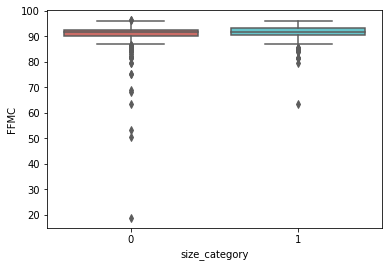

In [40]:
sns.boxplot(x="size_category",y="FFMC",data=forestfire,palette = "hls")

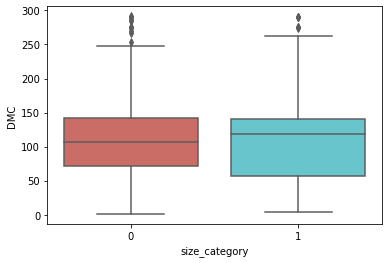

In [41]:
sns.boxplot(x="size_category",y="DMC",data=forestfire,palette = "hls")

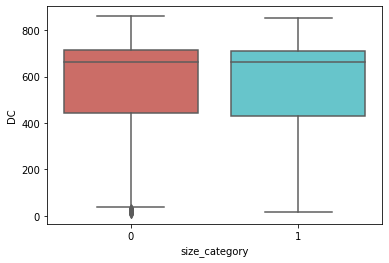

In [42]:
sns.boxplot(x="size_category",y="DC",data=forestfire,palette = "hls")

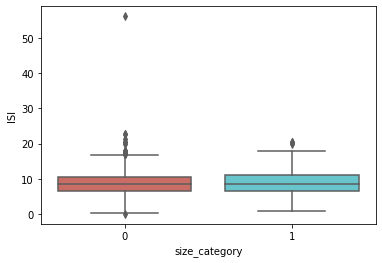

In [43]:
sns.boxplot(x="size_category",y="ISI",data=forestfire,palette = "hls")

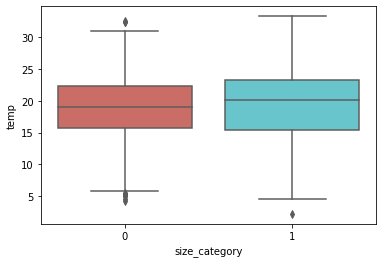

In [44]:
sns.boxplot(x="size_category",y="temp",data=forestfire,palette = "hls")

In [48]:
import matplotlib.pyplot as plt

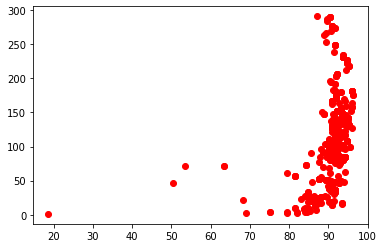

In [49]:
plt.scatter(x=forestfire['FFMC'],y=forestfire['DMC'],color='red')

In [12]:
forestfire.loc[forestfire["size_category"]=='small','size_category']=0
forestfire.loc[forestfire["size_category"]=='large','size_category']=1
forestfire["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [13]:
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

In [14]:
x = forestfire.iloc[:,0:28]
y = forestfire.iloc[:,28]

In [15]:
x1 = norm_func(x)

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x1,y, test_size=0.3,stratify = y)

In [17]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model

In [18]:
y_train = pd.DataFrame(y_train)
y_train.shape

(361, 1)

In [19]:
first_model = prep_model([28,50,40,20,1])

In [20]:
pred_train = first_model.predict(np.array(x_train))

12/12 [==============================] - 0s 2ms/step


In [21]:
## Here i am converting preedicted values to series
pred_train = pd.Series([i[0] for i in pred_train])

In [22]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"

In [23]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()

0    264
1     97
Name: size_category, dtype: int64

## TRAIN THE DATA

In [24]:
train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()

small    264
large     97
Name: original_class, dtype: int64

In [25]:
confusion_matrix(pred_train_class,train["original_class"])

array([[ 26,  70],
       [ 71, 194]])

In [27]:
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True)) 

0.6094182825484764

In [28]:
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,26,70
small,71,194


## DATA TESTING

In [29]:
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"

5/5 [==============================] - 0s 3ms/step


In [30]:
test =pd.concat([x_test,y_test],axis=1)
test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
497,0.998710,0.620262,0.777882,0.254902,0.967846,0.141176,0.200000,0.0,0.013458,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
431,0.947097,0.609580,0.700598,0.171123,0.678457,0.294118,0.400000,0.0,0.005830,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
133,0.967742,0.274983,0.794300,0.319073,0.495177,0.317647,0.300000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
225,0.965161,0.510682,0.845198,0.144385,0.665595,0.282353,0.500000,0.0,0.044507,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
490,0.985806,0.483115,0.701184,0.315508,0.852090,0.211765,0.400000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0.981935,0.762578,0.810015,0.247772,0.581994,0.317647,0.255556,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
83,0.947097,0.379394,0.757828,0.171123,0.463023,0.376471,0.055556,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
444,0.923871,0.995520,0.993784,0.131907,0.450161,0.505882,0.355556,0.0,0.009131,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
494,0.997419,0.561337,0.744811,0.249554,0.919614,0.176471,0.500000,0.0,0.007875,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"

In [32]:
test["original_class"].value_counts()

small    114
large     42
Name: original_class, dtype: int64

In [33]:
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) 

0.5448717948717948

In [34]:
confusion_matrix(pred_test_class,test["original_class"])

array([[10, 39],
       [32, 75]])

In [35]:
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,10,39
small,32,75
